## 鸢尾花，了解频率与频数

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris # 这个就是鸢尾花
import warnings

sns.set(style="darkgrid",font_scale = 1.2)

plt.rcParams["font.family"]="simHei"
plt.rcParams["axes.unicode_minus"]=False

iris=load_iris() # 这是一个150行，4列的数组
print(iris.data[:10])
print("*"*50)
print(iris.target[::20]) # tuple[start:stop:step]
print("*"*50)
print(iris.target[:])
print("*"*50)
print(iris.feature_names)
print(iris.target_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
**************************************************
[0 0 0 1 1 2 2 2]
**************************************************
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
**************************************************
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


print(iris.target[::20]) # tuple[start:stop:step] 详解：

0-50,51-100,101-150

0,21,41,61,81,101,121,141

0,0,0,1,1,2,2,2


In [5]:
data = np.concatenate([iris.data,iris.target.reshape(-1,1)],axis=1)
data = pd.DataFrame(data,
                   columns=["sepal_length","sepal_width","petal_length",
                           "petal_width","type"])
data.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,type
78,6.0,2.9,4.5,1.5,1.0
13,4.3,3.0,1.1,0.1,0.0
105,7.6,3.0,6.6,2.1,2.0
113,5.7,2.5,5.0,2.0,2.0
115,6.4,3.2,5.3,2.3,2.0
11,4.8,3.4,1.6,0.2,0.0
75,6.6,3.0,4.4,1.4,1.0
43,5.0,3.5,1.6,0.6,0.0
116,6.5,3.0,5.5,1.8,2.0
142,5.8,2.7,5.1,1.9,2.0


In [6]:
frequency = data["type"].value_counts()
print(frequency)
percentage = frequency*100/len(data)
print(percentage)

2.0    50
1.0    50
0.0    50
Name: type, dtype: int64
2.0    33.333333
1.0    33.333333
0.0    33.333333
Name: type, dtype: float64


<AxesSubplot:xlabel='type', ylabel='count'>

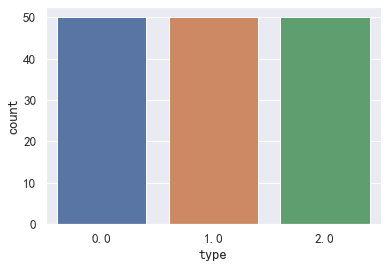

In [7]:
sns.countplot(x="type",data=data)

In [8]:
# 计算花萼的均值
mean=data["sepal_length"].mean()
# 计算花萼的中位数
median = data["sepal_length"].median()
# 计算花萼的长度众数
s = data["sepal_length"].mode()
mode = s.iloc[0]
print(mean,median,mode)

5.843333333333335 5.8 5.0


In [9]:
from scipy import stats
stats.mode(data['sepal_length']).mode


array([5.])

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


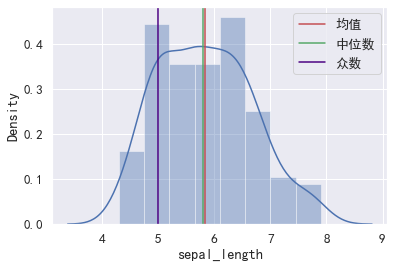

In [10]:
# 绘制数据分布图（直方图+密度图）
sns.distplot(data["sepal_length"])
# 绘制垂直图
plt.axvline(mean,ls="-",color="r",label="均值")
plt.axvline(median,ls="-",color="g",label="中位数")
plt.axvline(mode,ls="-",color="indigo",label="众数")
plt.legend()

In [11]:
x = [1,3,10,15,18,20,23,40]
# 在numpy中有quantile和percentile方法计算分位
print(np.quantile(x,q=[0.25,0.5,0.75]))
print(np.percentile(x,q=[25,50,75]))

[ 8.25 16.5  20.75]
[ 8.25 16.5  20.75]


In [12]:
x = [1,3,10,15,18,20,23,40]
s = pd.Series(x)
s.describe()

count     8.000000
mean     16.250000
std      12.395276
min       1.000000
25%       8.250000
50%      16.500000
75%      20.750000
max      40.000000
dtype: float64

## 查看鸢尾花花瓣长度、宽度的方差、标准差

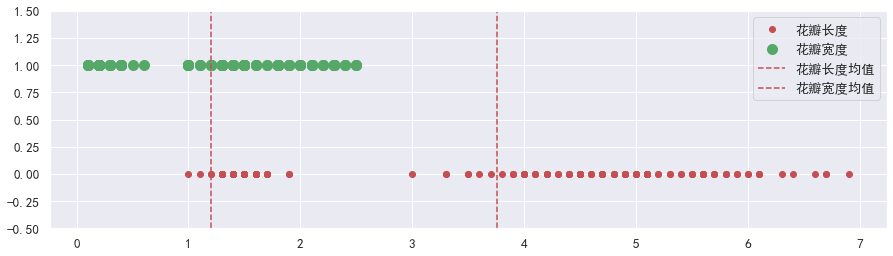

In [13]:
# 展画布
plt.figure(figsize=(15,4))
plt.ylim(-0.5,1.5)
plt.plot(data["petal_length"],np.zeros(len(data)),ls="",marker = "o",
        color = "r",label="花瓣长度")
plt.plot(data["petal_width"],np.ones(len(data)),ls="",marker="o",ms=10,
         color="g",label="花瓣宽度")
plt.axvline(data["petal_length"].mean(),ls="--",color = "r",label="花瓣长度均值")
plt.axvline(data["petal_width"].mean(),ls="--",color = "r",label="花瓣宽度均值")
plt.legend()

## 偏度差距

-0.8252328858418356 1.0045886318570656


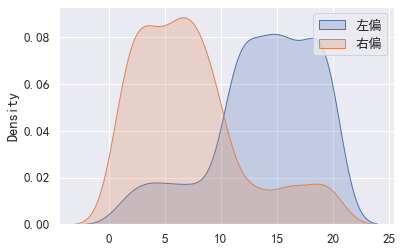

In [14]:
# 构造左偏
t1=np.random.randint(1,11,size=100)
t2=np.random.randint(11,21,size=500)
t3=np.concatenate([t1,t2])
left_skew = pd.Series(t3)

# 构造左偏
t1 = np.random.randint(1,11,size=500)
t2 = np.random.randint(11,21,size=100)
t3 =np.concatenate([t1,t2])
right_skew = pd.Series(t3)

print(left_skew.skew(),right_skew.skew())

sns.kdeplot(left_skew,shade=True,label="左偏")
sns.kdeplot(right_skew,shade=True,label='右偏')
plt.legend()


## 峰度

标准正太分布峰度 -0.0815612113177453 标准差： 1.0019405493135545
鸢尾花花萼宽度峰度 0.2282490424681929 标准差： 0.435866284936698
鸢尾花花瓣长度峰度 -1.4021034155217518 标准差： 1.7652982332594667


<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

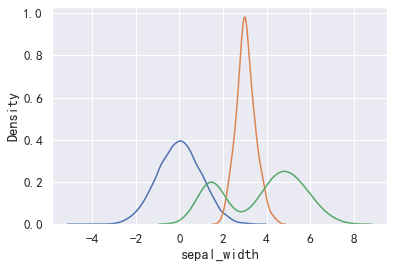

In [18]:
# 标准正太分布
standard_normal = pd.Series(np.random.normal(0,1,size=10000))
print("标准正太分布峰度",standard_normal.kurt(),"标准差：",standard_normal.std())
print("鸢尾花花萼宽度峰度",data['sepal_width'].kurt(),"标准差：",data['sepal_width'].std())
print("鸢尾花花瓣长度峰度",data['petal_length'].kurt(),"标准差：",data['petal_length'].std())

# 计算峰度 画图
sns.kdeplot(standard_normal,label="标准正太峰度")
sns.kdeplot(data['sepal_width'],label="标准正太峰度")
sns.kdeplot(data['petal_length'],label="标准正太峰度")